# Randomized SVD

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

## Obtaining a low-rank matrix

Let's begin by making a low-rank matrix:

2.0999639133084558e-13


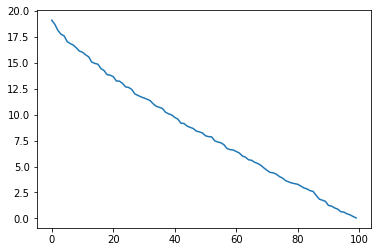

In [2]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0).dot(VT0) - A0))

pt.plot(sigma0)

A randomly drawn Gaussian matrix: Emphatically not low-rank. Let's swap out the singular values with cleanly exponentially decaying ones:

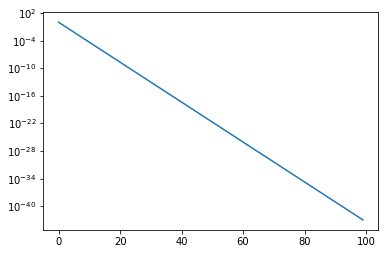

In [3]:
sigma = np.exp(-np.arange(n))
pt.semilogy(sigma)

A = (U0 * sigma).dot(VT0)

## Find the approximate range

Let's fix parameters first. What accuracy should we obtain for the values of $k$ and $p$ below? (where `p` represents the 'extra' dimensions)

In [4]:
k = 10
p = 5

Draw a random Gaussian matrix `Omega` and obtain orthogonal columns in a matrix `Q` spanning the range:

In [10]:
#clear
Omega = np.random.randn(n, k+p)

Y = A @ Omega

Q, _ = la.qr(Y)

As an alternative to the above, use a few iterations of the power method on `Omega`:

In [14]:
#clear
Omega = np.random.randn(n, k+p)

Y = A @ Omega

Y = A @ A.T @ Y

Q, _ = la.qr(Y)

* Observations about associativity?

## Convert to factorization form

Reconstruct $C$ in the factorization-form LRA $A\approx BC$:

(Recall $A\approx QQ^TA$, $B=Q$)

In [15]:
#clear
C = Q.T @ A

print(C.shape)

(15, 100)


Sanity-check that form:

In [16]:
#clear
Aapprox1 = Q.dot(C)

la.norm(A - Aapprox1, 2)

3.7208685050055835e-06

## Compute the approximate SVD

Compute the SVD of $C=U_C \Sigma_C V_C^T$:

(Make sure to pass `full_matrices=False` to the SVD.)

In [17]:
#clear
UC, sigmaC, VTC = la.svd(C, full_matrices=False)

Reconstruct the SVD of $A$: $A\approx QU_C \Sigma_C V_C^T$

In [18]:
#clear
UAapprox = Q @ UC

sigmaAapprox = sigmaC

VTAapprox = VTC

Compare the 2-norm of the reconstructed $A$ with the original $A$:

In [19]:
#clear
Aapprox = (UAapprox*sigmaAapprox) @ VTAapprox

la.norm(A - Aapprox, 2)

3.7208685050056457e-06

## Estimate the error

Compute an a-posteriori estimate of approximation error in the spectral norm:

In [20]:
#clear
omega = np.random.randn(n)

Aomega = A @ omega

err = Aomega - Q @ Q.T @ Aomega

la.norm(err, 2) / la.norm(omega, 2)

1.4702805615731663e-07

* Is this the right direction for the error estimator?
* Is the estimator supposed to be conservative? Can it be?